# AI-ClientProject-4 --> Quora Question Pairs

### PROJECT GOAL
##### Create a model that can predict which of the provided pairs of questions contain two questions with the same meaning.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installing libraries which are needed for loading, processing, and modeling our question-pair data.
!pip install -q pandas numpy scikit-learn sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.8 MB/s eta 0:00:00


In [ ]:
# 📦 Data Handling
import pandas as pd

# 🤗 Text Embedding / Feature Extraction
from sentence_transformers import SentenceTransformer

# 📊 Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 💾 Model Saving and Loading
import joblib

# 🧮 Utilities
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
#This step loads and reduces the dataset to a manageable size and ensures data quality.
df = pd.read_csv("/content/drive/MyDrive/AI CAPSTONE PROJECT/Client Project/train.csv") #Load the data
df = df.sample(20000, random_state=42) #Randomly selects 20,000 rows to make training faster.
df = df.dropna() #Removes rows with missing values (essential to avoid errors during training).
df = df[['question1', 'question2', 'is_duplicate']] #Keeps only the relevant columns.
df.head() #Displays the first 5 rows (useful for inspection).

,question1,question2,is_duplicate
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,How close we are to see 3rd world war?,How close is a World War III?,1


In [ ]:
#Counts how many duplicate vs. non-duplicate pairs exist
df['is_duplicate'].value_counts()

,count
is_duplicate,
0,12606
1,7394


<Axes: xlabel='is_duplicate'>

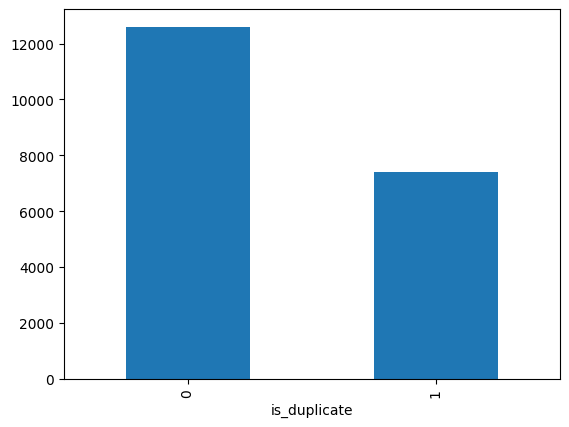

In [ ]:
#Bar plot showing how many duplicate (1) vs. non-duplicate (0) question pairs exist.
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
#This step transforms each question pair into numerical features that can be fed to a machine learning model.
embedder = SentenceTransformer('all-mpnet-base-v2')

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_features(q1, q2):
    vec1 = embedder.encode([q1])
    vec2 = embedder.encode([q2])
    cos_sim = cosine_similarity(vec1, vec2)[0][0]

    tokens1 = set(q1.lower().split())
    tokens2 = set(q2.lower().split())
    common_words_ratio = len(tokens1 & tokens2) / max(len(tokens1 | tokens2), 1)
    abs_len_diff = abs(len(q1) - len(q2))

    return [cos_sim, common_words_ratio, abs_len_diff]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Extract features
features = []
for q1, q2 in tqdm(zip(df['question1'], df['question2']), total=len(df)):
    features.append(extract_features(q1, q2))

100%|██████████| 20000/20000 [1:18:21<00:00,  4.25it/s]


In [ ]:
# Convert to DataFrame
X = pd.DataFrame(features, columns=["cos_sim", "common_words_ratio", "abs_len_diff"])
y = df['is_duplicate'].values

In [ ]:
#Splits data into 80% training and 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Training the Model
model = LogisticRegression(class_weight='balanced')  # better for imbalanced dataset
#Fits the model on the training data.
model.fit(X_train, y_train)
y_pred = model.predict(X_test) #Predicts on the test set
print("Accuracy:", accuracy_score(y_test, y_pred)) #Model Accuracy

Accuracy: 0.8085


In [ ]:
# Save model
joblib.dump(model, '/content/drive/MyDrive/AI CAPSTONE PROJECT/Client Project/best_model_80p.pkl')

['/content/drive/MyDrive/AI CAPSTONE PROJECT/Client Project/best_model_80p.pkl']

In [ ]:
# Load model
my_model = joblib.load('/content/drive/MyDrive/AI CAPSTONE PROJECT/Client Project/best_model_80p.pkl')

In [ ]:
def predict_duplicate(q1, q2):
    features = np.array(extract_features(q1, q2)).reshape(1, -1)
    pred = my_model.predict(features)[0]
    return "Duplicate" if pred == 1 else "Not Duplicate"

# Test
print(predict_duplicate("How can I be a good programmer?", "What should I do to become a great coder?"))


Duplicate


In [ ]:
print(predict_duplicate("How can I be a good software engineer?", "What are the tips to become a successful software engineer?"))

Duplicate


In [ ]:
print(predict_duplicate("How can I be a good software engineer?", "What are the tips to become a successful data engineer?"))

Not Duplicate


In [ ]:
print(predict_duplicate("Is photosynthesis same as respiration?", "Is respiration same as photosynthesis?"))

Duplicate
